In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
json_file_path = "./output/encoding_d7-204252.json"

with open(json_file_path, 'r') as j:
    contents = json.loads(j.read())

In [3]:
contents

{'Proto': {'10': 'tcp',
  '11': 'udp',
  '1': 'icmp',
  '0': 'arp',
  '9': 'rtp',
  '5': 'ipx/spx',
  '8': 'rtcp',
  '3': 'ipv6',
  '6': 'pim',
  '2': 'igmp',
  '12': 'udt',
  '7': 'rarp',
  '4': 'ipv6-icmp'},
 'Dir': {'4': '  <?>',
  '1': '   ?>',
  '3': '  <->',
  '0': '   ->',
  '5': '  who',
  '2': '  <-'},
 'State': {'106': 'RPA_FPA',
  '108': 'RPA_PA',
  '89': 'PA_A',
  '92': 'PA_PA',
  '105': 'RPA_',
  '102': 'RA_PA',
  '34': 'FRA_PA',
  '4': 'CON',
  '95': 'PA_RPA',
  '19': 'FPA_FA',
  '12': 'FA_FA',
  '74': 'INT',
  '20': 'FPA_FPA',
  '11': 'FA_A',
  '94': 'PA_RA',
  '15': 'FA_R',
  '101': 'RA_FPA',
  '170': 'URP',
  '3': 'A_PA',
  '164': 'URH',
  '52': 'FSPA_FSPA',
  '154': 'S_RA',
  '103': 'RED',
  '91': 'PA_FRPA',
  '13': 'FA_FPA',
  '107': 'RPA_FSRPA',
  '38': 'FRPA_FPA',
  '54': 'FSPA_FSRPA',
  '2': 'A_A',
  '28': 'FRA_',
  '29': 'FRA_A',
  '141': 'SRPA_FSPA',
  '173': '_FSPA',
  '65': 'FSRPA_FSPA',
  '142': 'SRPA_FSRPA',
  '88': 'PA_',
  '14': 'FA_FRA',
  '21': 'FPA_FRA'

In [4]:
ruleset_df = pd.read_csv("./output/ruleset_d7-204252.csv", index_col=0)
flow_df = pd.read_csv("capture20110818-2.binetflow")

In [5]:
flow_df['Label'].unique()
malicious = list(filter(lambda x: "Botnet" in x, flow_df['Label'].unique()))

all_bad_db = flow_df[flow_df["Label"].isin(malicious)]
all_good_db = flow_df[~ flow_df["Label"].isin(malicious)]

# Port analysis
good_sport_df = pd.DataFrame(all_good_db['Sport'])

# Fill Sport for null to 0 and convert to int
good_sport_df = pd.DataFrame(good_sport_df['Sport'].fillna(value="0"))
good_sport_df = pd.DataFrame(good_sport_df['Sport'].apply(lambda x: int(int(x, 16))))


In [6]:
good_sport_df

,Sport
0,4216
1,78113
2,128
3,345368
4,102531
...,...
107246,357237
107247,406864
107248,365697
107249,356370


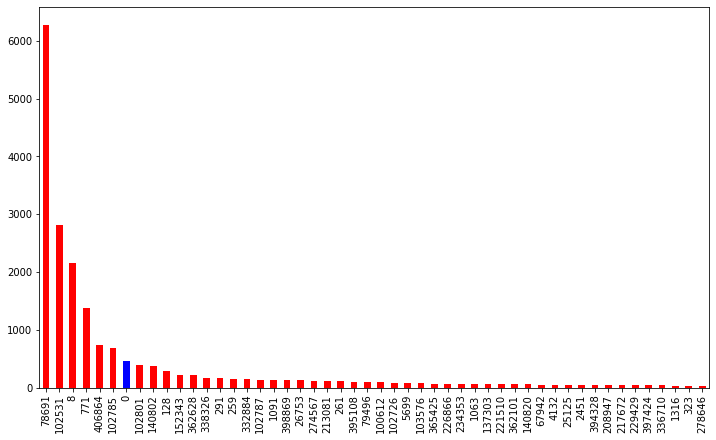

In [51]:
n_of_ports = 50
plt.figure(figsize=(12, 7))

freq_good = good_sport_df['Sport'].value_counts()
red_freq_good = freq_good[0:n_of_ports]

coloured_bars = []
nhit_on_freq = {}

for _, ruleset in ruleset_df.iterrows():
    #print(ruleset)
    for port in red_freq_good.index:
        if ruleset['Sport_greater'] is None:
            continue
        if not port in nhit_on_freq.keys():
            nhit_on_freq[port] = 0
        if ruleset['Sport_greater']:
            if port > ruleset['Sport_threshold']:
                nhit_on_freq[port] += 1
        if not ruleset['Sport_greater']:
            if port > ruleset['Sport_threshold']:
                nhit_on_freq[port] += 1

#TODO In the future, distinguish by number of hits

for k in nhit_on_freq.keys():
    if nhit_on_freq[k] > 0:
        coloured_bars.append(k)

profit_color = [{f in coloured_bars: 'red', f not in coloured_bars: 'blue'}[True] for f in red_freq_good.index]

bar_plot = red_freq_good.plot.bar(color=profit_color)
plt.show()

In [37]:
nhit_on_freq

{78691: 10,
 102531: 10,
 8: 10,
 771: 10,
 406864: 10,
 102785: 10,
 0: 0,
 102801: 10,
 140802: 10,
 128: 10,
 152343: 10,
 362628: 10,
 338326: 10,
 291: 10,
 259: 10,
 332884: 10,
 102787: 10,
 1091: 10,
 398869: 10,
 26753: 10,
 274567: 10,
 213081: 10,
 261: 10,
 395108: 10,
 79496: 10,
 100612: 10,
 102726: 10,
 5699: 10,
 103576: 10,
 365425: 10,
 226866: 10,
 234353: 10,
 1063: 10,
 137303: 10,
 221510: 10,
 362101: 10,
 140820: 10,
 67942: 10,
 4132: 10,
 25125: 10,
 2451: 10,
 394328: 10,
 208947: 10,
 217672: 10,
 229429: 10,
 397424: 10,
 336710: 10,
 1316: 10,
 323: 10,
 278646: 10}

Below here is the same analysis as above, but for Dport

In [41]:
# Port analysis
bad_sport_df = pd.DataFrame(all_good_db['Dport'])

# Fill Sport for null to 0 and convert to int
bad_sport_df = pd.DataFrame(bad_sport_df['Dport'].fillna(value="0"))
bad_sport_df = pd.DataFrame(bad_sport_df['Dport'].apply(lambda x: int(int(x, 16))))


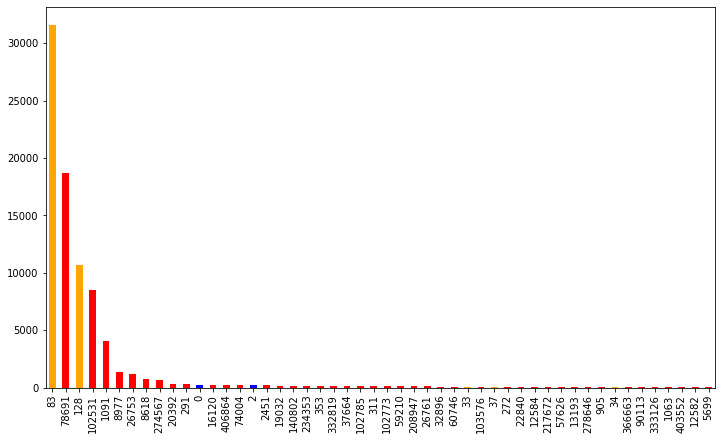

In [50]:
n_of_ports = 50
plt.figure(figsize=(12, 7))

freq_bad = bad_sport_df['Dport'].value_counts()
red_freq_bad = freq_bad[0:n_of_ports]

coloured_bars_bad = []
nhit_on_freq_bad = {}

for _, ruleset in ruleset_df.iterrows():
    #print(ruleset)
    for port in red_freq_bad.index:
        if ruleset['Dport_greater'] is None:
            continue
        if not port in nhit_on_freq_bad.keys():
            nhit_on_freq_bad[port] = 0
        if ruleset['Dport_greater']:
            if port > ruleset['Dport_threshold']:
                nhit_on_freq_bad[port] += 1
        if not ruleset['Dport_greater']:
            if port > ruleset['Dport_threshold']:
                nhit_on_freq_bad[port] += 1

#TODO In the future, distinguish by number of hits

for k in nhit_on_freq_bad.keys():
    if nhit_on_freq_bad[k] > 0:
        coloured_bars_bad.append(k)

bad_color = [{f not in nhit_on_freq_bad.keys(): 'blue',
              nhit_on_freq_bad[f] == 4: 'orange',
              nhit_on_freq_bad[f] == 5: 'red',
              nhit_on_freq_bad[f] == 0: 'blue',
              }[True] for f in red_freq_bad.index]

red_freq_bad.plot.bar(color=bad_color)
plt.show()

In [43]:
nhit_on_freq_bad

{83: 4,
 78691: 5,
 128: 4,
 102531: 5,
 1091: 5,
 8977: 5,
 26753: 5,
 8618: 5,
 274567: 5,
 20392: 5,
 291: 5,
 0: 0,
 16120: 5,
 406864: 5,
 74004: 5,
 2: 0,
 2451: 5,
 19032: 5,
 140802: 5,
 234353: 5,
 353: 5,
 332819: 5,
 37664: 5,
 102785: 5,
 311: 5,
 102773: 5,
 59210: 5,
 208947: 5,
 26761: 5,
 32896: 5,
 60746: 5,
 33: 4,
 103576: 5,
 37: 4,
 272: 5,
 22840: 5,
 12584: 5,
 217672: 5,
 57626: 5,
 13193: 5,
 278646: 5,
 905: 5,
 34: 4,
 366663: 5,
 90113: 5,
 333126: 5,
 1063: 5,
 403552: 5,
 12582: 5,
 5699: 5}